# problem 2

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from keras.datasets import mnist
from keras.utils import np_utils
from tensorflow.keras.layers import BatchNormalization
from keras import layers
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
import numpy as np
import argparse
import cv2
import sys
import tensorflow as tf

2022-11-04 22:31:44.483938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 22:31:44.677019: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 22:31:44.711118: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 22:31:46.026890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [3]:
import tensorflow
print(tensorflow.__version__)

2.10.0


1.Fix batch size to 64 and start with 10 candidate learning rates between  10−9  and  101  and train your model for 5 epochs. Plot the training loss as a function of learning rate. You should see a curve like Figure 3 in reference below. From that figure identify the values of  𝑙𝑟𝑚𝑖𝑛  and  𝑙𝑟𝑚𝑎𝑥 .

In [2]:
%run ./pyimagesearch/clr_callback.py
%run ./pyimagesearch/learningratefinder.py
%run ./pyimagesearch/minigooglenet.py
%run ./pyimagesearch/config.py

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import sys

In [3]:
import sys
sys.argv=['']
del sys

ap = argparse.ArgumentParser()
ap.add_argument("-f", "--lr-find", type=int, default=0,help="whether or not to find optimal learning rate")
args = vars(ap.parse_args())

In [4]:
# load the training and testing data
print("[INFO] loading Fashion MNIST data...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
# Fashion MNIST images are 28x28 but the network we will be training
# is expecting 32x32 images
trainX = np.array([cv2.resize(x, (32, 32)) for x in trainX])
testX = np.array([cv2.resize(x, (32, 32)) for x in testX])
# scale the pixel intensities to the range [0, 1]
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
# reshape the data matrices to include a channel dimension (required
# for training)
trainX = trainX.reshape((trainX.shape[0], 32, 32, 1))
testX = testX.reshape((testX.shape[0], 32, 32, 1))
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)
# construct the image generator for data augmentation
aug = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True,fill_mode="nearest")

[INFO] loading Fashion MNIST data...


In [7]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=MIN_LR, momentum=0.9)
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])


stepSize = STEP_SIZE * (trainX.shape[0] // BATCH_SIZE)
clr = CyclicLR(
	mode='triangular',
	base_lr=1e-10,
	max_lr=10,
	step_size=10)
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
              validation_data=(testX, testY),
              steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
              epochs=5,
              callbacks=[clr],
              verbose=1)
# evaluate the network and show a classification report
print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=CLASSES))

[INFO] compiling model...


/home/sb7594/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2022-11-04 21:51:56.122212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 21:51:56.743566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30975 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:d8:00.0, compute capability: 7.0


[INFO] training network...
Epoch 1/5


2022-11-04 21:52:05.979891: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


937/937 [==============================] - 46s 24ms/step - loss: 2.8472 - accuracy: 0.1011 - val_loss: 2.6621 - val_accuracy: 0.1000
Epoch 2/5
937/937 [==============================] - 22s 23ms/step - loss: 2.7119 - accuracy: 0.1005 - val_loss: 2.6905 - val_accuracy: 0.1000
Epoch 3/5
937/937 [==============================] - 22s 23ms/step - loss: 2.7393 - accuracy: 0.0988 - val_loss: 2.7341 - val_accuracy: 0.1000
Epoch 4/5
937/937 [==============================] - 22s 23ms/step - loss: 2.7221 - accuracy: 0.0997 - val_loss: 2.7516 - val_accuracy: 0.1000
Epoch 5/5
937/937 [==============================] - 22s 23ms/step - loss: 2.7536 - accuracy: 0.0985 - val_loss: 2.9144 - val_accuracy: 0.1000
[INFO] evaluating network...
157/157 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

         top       0.00      0.00      0.00      1000
     trouser       0.00      0.00      0.00      1000
    pullover       0.00      0.00      0.00     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/3
938/938 [==============================] - 20s 21ms/step - loss: 7.1260 - accuracy: 0.1000
Epoch 2/3
938/938 [==============================] - 20s 22ms/step - loss: 7.0907 - accuracy: 0.1000
Epoch 3/3
938/938 [==============================] - 20s 21ms/step - loss: 3.3672 - accuracy: 0.0989


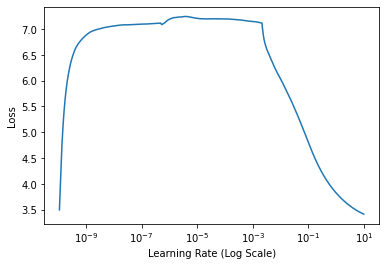

In [8]:
lrf = LearningRateFinder(model)
lrf.find(
        aug.flow(trainX, trainY, batch_size=BATCH_SIZE),1e-10, 1e+1,stepsPerEpoch=np.ceil((len(trainX) / float(BATCH_SIZE))),
        batchSize=BATCH_SIZE)

	# plot the loss for the various learning rates and save the
	# resulting plot to disk
lrf.plot_loss()

2.Use the cyclical learning rate policy (with exponential decay) and train your network using batch size 64 and  𝑙𝑟𝑚𝑖𝑛  and  𝑙𝑟𝑚𝑎𝑥  values obtained in part 1. Plot train/validation loss and accuracy curve (similar to Figure 4 in reference).

In [9]:
MIN_LR = 1e-9
MAX_LR = 1e-3


# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=MIN_LR, momentum=0.9)
model = MiniGoogLeNet.build(width=32, height=32, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])


stepSize = STEP_SIZE * (trainX.shape[0] // BATCH_SIZE)
clr = CyclicLR(
	mode='triangular',
	base_lr=MIN_LR,
	max_lr=MAX_LR,
	step_size=STEP_SIZE)
# train the network
print("[INFO] training network...")
H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BATCH_SIZE),
	validation_data=(testX, testY),
	steps_per_epoch=trainX.shape[0] // BATCH_SIZE,
	epochs=5,
	callbacks=[clr],
	verbose=1)
# evaluate the network and show a classification report
print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=BATCH_SIZE)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=CLASSES))

[INFO] compiling model...


/home/sb7594/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


[INFO] training network...
Epoch 1/5
937/937 [==============================] - 23s 23ms/step - loss: 1.0440 - accuracy: 0.6327 - val_loss: 0.6084 - val_accuracy: 0.7873
Epoch 2/5
937/937 [==============================] - 21s 23ms/step - loss: 0.6232 - accuracy: 0.7754 - val_loss: 0.5568 - val_accuracy: 0.8007
Epoch 3/5
937/937 [==============================] - 21s 23ms/step - loss: 0.5309 - accuracy: 0.8092 - val_loss: 0.4599 - val_accuracy: 0.8361
Epoch 4/5
937/937 [==============================] - 21s 22ms/step - loss: 0.4780 - accuracy: 0.8289 - val_loss: 0.4426 - val_accuracy: 0.8311
Epoch 5/5
937/937 [==============================] - 21s 22ms/step - loss: 0.4411 - accuracy: 0.8427 - val_loss: 0.4254 - val_accuracy: 0.8459
[INFO] evaluating network...
157/157 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

         top       0.81      0.83      0.82      1000
     trouser       1.00      0.95      0.98      1000
    pullove

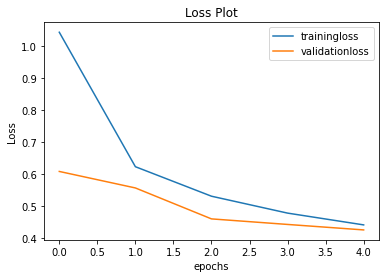

In [11]:
plt.plot(list(range(0, 5)), H.history["loss"],label='trainingloss')
plt.plot(list(range(0, 5)), H.history["val_loss"],label='validationloss')
plt.legend()
plt.title("Loss Plot")
plt.xlabel("epochs")
plt.ylabel("Loss")

plt.show()

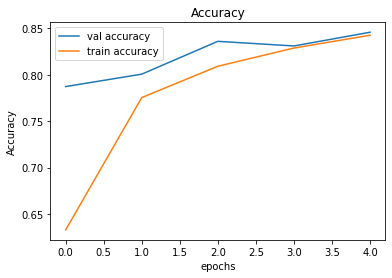

In [12]:
plt.plot(list(range(0, 5)), H.history["val_accuracy"],label="val accuracy")
plt.plot(list(range(0, 5)), H.history["accuracy"],label="train accuracy")
plt.legend()
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")

plt.show()

3. We want to test if increasing batch size for a fixed learning rate has the same effect as decreasing
learning rate for fixed batch size. Fix learning rate to lrmax and train your network starting with batch
size 32 and incrementally going up to 16384 (in increments of a factor of 2; like 32, 64...). You can
choose a step size (in terms of the number of iterations) to increment the batch size. If your GPU
cannot handle large batch sizes, you need to employ an effective batch size approach as discussed in
Lecture 3 to simulate large batches. Plot the training loss. Is the generalization of your final model
similar or different from than cyclical learning rate policy?

Ans:<br>
We can see that the validation accuracy is better and hence the generalization is better

In [16]:
losses = []

for batch_size in [32,64,128,256,512,1024,2048,4096,8192,16384]:
    clr = CyclicLR(
    mode='triangular',
    base_lr=1e-3,
    max_lr=1e-3,
    step_size=(trainX.shape[0] // batch_size))
    print("[INFO] training network...")
    print(f"batch size is {batch_size}")
    H = model.fit(
    x=aug.flow(trainX, trainY, batch_size=batch_size),
    validation_data=(testX, testY),
    steps_per_epoch=trainX.shape[0] // batch_size,
    epochs=5,
    callbacks=[clr],
    verbose=1)
    
    losses.append(H.history["loss"][4])
    print("[INFO] evaluating network...")
    
    predictions = model.predict(x=testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1), target_names=CLASSES))

[INFO] training network...
batch size is 32
Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4008 - accuracy: 0.8565 - val_loss: 0.4848 - val_accuracy: 0.8227
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3568 - accuracy: 0.8728 - val_loss: 0.4853 - val_accuracy: 0.8306
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3267 - accuracy: 0.8834 - val_loss: 0.3245 - val_accuracy: 0.8786
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3080 - accuracy: 0.8899 - val_loss: 0.3132 - val_accuracy: 0.8904
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2917 - accuracy: 0.8968 - val_loss: 0.3093 - val_accuracy: 0.8875
[INFO] evaluating network...
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         top       0.88      0.81      0.84      1000
     trouser       1.00      0.97     

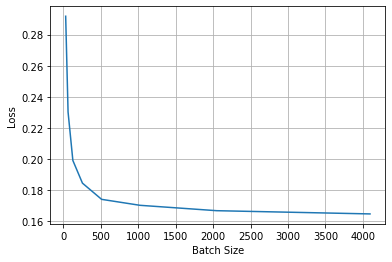

In [17]:
plt.plot([32,64,128,256,512,1024,2048,4096,8192,16384], losses)
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.grid()